#Необходимые вещи из прошлых ноутбуков

In [ ]:
import numpy as np
import seaborn as sns

In [ ]:
np.random.seed(1)

Сгенерируем выборку:

In [ ]:
def linear_func(x):
    target_k = 5
    target_b = -2
    return target_k * x + target_b

In [ ]:
xes = np.linspace(0, 1, 11)

print(xes)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


In [ ]:
target_ys = np.array([linear_func(x) for x in xes])
print(target_ys)

[-2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3. ]


In [ ]:
noise = np.random.normal(0, 0.1, 11)
noisy_target_ys = target_ys + noise

print(noisy_target_ys)

[-1.83756546 -1.56117564 -1.05281718 -0.60729686  0.08654076  0.26984613
  1.17448118  1.42387931  2.03190391  2.47506296  3.14621079]


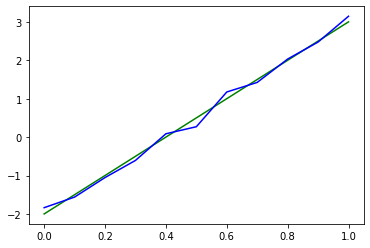

In [ ]:
sns.lineplot(x = xes, y = target_ys, color = "g")
sns.lineplot(x = xes, y = noisy_target_ys, color = "b")


Формируем выборку XOR:

In [ ]:
xor_x = np.random.rand(1000,2) * 2 - 1
print(xor_x)

[[-0.71922612 -0.60379702]
 [ 0.60148914  0.93652315]
 [-0.37315164  0.38464523]
 ...
 [-0.15088018 -0.591755  ]
 [-0.86582108 -0.60270347]
 [-0.4551983   0.19757784]]


In [ ]:
xor_targets = [np.sign(x[0] * x[1]) for x in xor_x]
print(xor_targets)

[1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 1.0, -1.0, -1.0, 1.0, -1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0, 1.0, -1.0, 1.0, -1.0, 1.0, 1.0, -1.0, -1.0, -1.0, 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

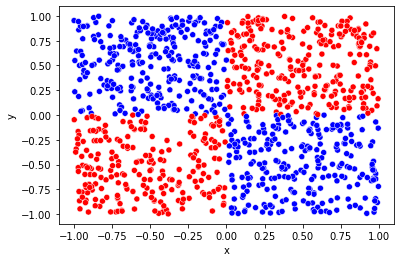

In [ ]:
import pandas as pd

df = pd.DataFrame(xor_x, columns=["x", "y"])

df["val"] = pd.Series(xor_targets).apply(lambda x: "red" if x==1 else "blue")

sns.scatterplot("x", "y", data=df, c=df["val"]).plot()

In [ ]:
xor_targets_for_net = np.array([[0, 1] if np.sign(x[0] * x[1]) > 0 else [1, 0] for x in xor_x])

In [ ]:
def estimate_accuracy(x, y):
    result = 0
    for i in range(len(x)):
        if np.argmax(x[i]) == np.argmax(y[i]):
            result += 1
    print("accuracy is {}".format(result/len(x) * 100))

In [ ]:
def BCE_loss_two_inputs(y, target_labels):
    eps = 1e-12
    target_label = np.argmax(target_labels)
    return -(target_label * np.log(y + eps) + (1-target_label) * np.log(1 - y + eps)).sum()

def BCE__two_inputs_loss_derivative(y, target_labels):
    target_label = np.argmax(target_labels)
    return (y - target_label)/(y * (1-y))

In [ ]:
def BCE_loss_one_input(y, target_label):
    eps = 1e-12
    return -(target_label * np.log(y + eps) + (1-target_label) * np.log(1 - y + eps)).sum()

def BCE_one_input_loss_derivative(y, target_label):
    return (y - target_label)/(y * (1-y))

#Начало нового материала

In [ ]:
class LinearLayer:
    def __init__(self, input_size, output_size, activation_function, activation_function_derivative):
        
        self.input_size = input_size
        self.output_size = output_size
        
        self.W = np.random.random_sample((output_size, input_size)) * 2 - 1
        self.b = np.random.random_sample((output_size,)) * 2 - 1
            
        self.grad_W = np.zeros((output_size, input_size))
        self.grad_b = np.zeros((output_size,))
        
        self.activation_function = activation_function
        self.activation_function_derivative = activation_function_derivative
        
    def forward(self, x):
        z = self.W @ x + self.b # z^(l+1) = W^(l)*h^(l) + b^(l)
        h = self.activation_function(z) # h^(l) = f(z^(l))
        return h, z
    
    def backward(self, delta_next, z, w_next):
        return w_next.T @ delta_next * self.activation_function_derivative(z)

    def backward_as_last_layer(self, loss_der, z):
        return self.activation_function_derivative(z) * loss_der
    
    def clear_grad(self):
        self.grad_W = np.zeros((self.output_size, self.input_size))
        self.grad_b = np.zeros((self.output_size,))


Возьмём функцию потерь MSE:

In [ ]:
def MSE_loss(x, y):
    return ((x-y) ** 2).mean()

def MSE_loss_deriv(x, y):
    return (x - y)

У нас не было функции активации до, так что можно сказать что она была линейная - f(x)=x, а производная = 1:

In [ ]:
def linear_func(x):
    return x

def linear_func_deriv(x):
    return 1


Зададим новую функцию активации — сигмоиду.

In [ ]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

Уже достаточно похоже на реальную сеть. Составляем её из слоёв, как из конструктора, и потом применяем backward для обучения.

h — значения выходов после функции активации, z — значения выходов после применения слоя h = f_act(z).

In [ ]:
import tqdm


class NN:
    def __init__(self, structure, loss, loss_derivative):
        self.structure = structure
        self.layers = []
        self.loss = loss
        self.loss_derivative = loss_derivative
        for i in range(1, len(structure)):
            self.layers.append(LinearLayer(structure[i-1], structure[i], sigmoid, sigmoid_deriv))
        
    def apply(self, x):
        h_array = [x]
        z_array = []
        for layer in self.layers:
            h, z = layer.forward(h_array[-1])
            h_array.append(h)
            z_array.append(z)
        return h_array[-1]
    
    def forward(self, x):
        h_array = [x]
        z_array = []
        for layer in self.layers:
            h, z = layer.forward(h_array[-1])
            h_array.append(h)
            z_array.append(z)        
        return h_array, z_array
    
    def clear_grad_values(self):
        for layer in self.layers:
            layer.clear_grad()
    
    def train(self, X, y, iter_num = 500, alpha = 0.1):
        cnt = 0
        m = len(y)
        avg_cost_func = []     
        for _ in tqdm.tqdm(range(iter_num)):    
            avg_cost = 0
            self.clear_grad_values()
            for i in range(len(y)):
                # perform the feed forward pass and return the stored h and z values, to be used in the
                # gradient descent step
                
                # one sample per time
                h, z = self.forward(X[i, :])             

                # backward pass
                grads = {}
                for layer_num, layer in reversed(list(enumerate(self.layers))):
                    if layer_num == len(self.layers) - 1:
                        loss_deriv = self.loss_derivative(h[-1], y[i,:])
                        grads[layer_num+1] = loss_deriv
                        avg_cost += self.loss(h[-1], y[i,:])
                        grads[layer_num] = layer.backward_as_last_layer(loss_deriv, z[layer_num])
                    else:
                        grads[layer_num] = layer.backward(grads[layer_num+1], z[layer_num], self.layers[layer_num+1].W)
                    layer.grad_W += grads[layer_num][:,np.newaxis] @ np.transpose(h[layer_num][:,np.newaxis])
                    layer.grad_b += grads[layer_num]
                        
            # update weights
            for layer in self.layers:
                layer.W -= alpha * (layer.grad_W / m)
                layer.b -= alpha * (layer.grad_b / m)
                
            # complete the average cost calculation
            avg_cost = 1.0 / m * avg_cost
            avg_cost_func.append(avg_cost)
            
        return avg_cost_func

In [ ]:
np.random.seed(1)

xor_x = np.random.rand(100,2) * 2 - 1
xor_targets = np.array([[0, 1] if np.sign(x[0] * x[1]) > 0 else [1, 0] for x in xor_x])
xor_targets2 = np.array([1 if np.sign(x[0] * x[1]) > 0 else 0 for x in xor_x])

100%|██████████| 3000/3000 [00:33<00:00, 90.27it/s]


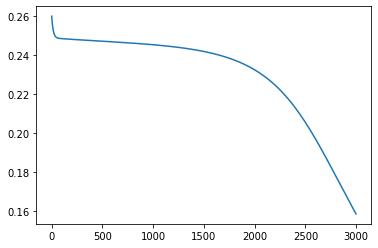

In [ ]:
np.random.seed(1)

N_mse_with_sigm = NN([2,4,2], MSE_loss, MSE_loss_deriv)

avg_cost_func = N_mse_with_sigm.train(xor_x, xor_targets, 3000, 0.25)

sns.lineplot(data=avg_cost_func)   
# get the prediction accuracy and print

In [ ]:
def estimate_accuracy_one_output(x, y):
    result = 0
    for i in range(len(x)):
        if int(x[i] > 0.5) == y[i]:
            result += 1
    print("accuracy is {}".format(result/len(x) * 100))

In [ ]:
def predict_classes(NN, x):
    return [np.argmax(NN.apply(x_i)) for x_i in x]

In [ ]:
predictions_mse = [N_mse_with_sigm.apply(x) for x in xor_x]

estimate_accuracy(predictions_mse, xor_targets)

accuracy is 88.0


100%|██████████| 5000/5000 [00:48<00:00, 103.24it/s]


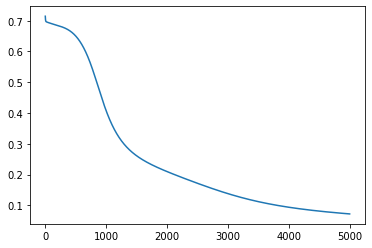

In [ ]:
np.random.seed(1)

N_bce = NN([2,4,1], BCE_loss_one_input, BCE_one_input_loss_derivative)

avg_cost_func = N_bce.train(xor_x, xor_targets2.reshape(-1, 1), 5000, 0.25)

sns.lineplot(data=avg_cost_func)
# get the prediction accuracy and print

In [ ]:
predictions_bce = [N_bce.apply(x) for x in xor_x]

estimate_accuracy_one_output(predictions_bce, xor_targets2)

accuracy is 99.0


Тест того, что получилось, на линейной выборке:



 12%|█▏        | 117/1000 [00:00<00:00, 1169.09it/s]

[0.6377496]


100%|██████████| 1000/1000 [00:00<00:00, 1077.34it/s]


[0.99849655]


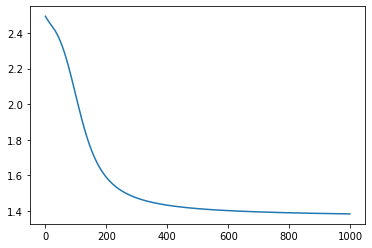

In [ ]:
N = NN([1,2,1], MSE_loss, MSE_loss_deriv)

print(N.apply([1]))

avg_cost_func = N.train(xes.reshape(-1, 1), target_ys.reshape(-1, 1), 1000, 0.5)
    
sns.lineplot(data=avg_cost_func)
# get the prediction accuracy and print
prediction = N.apply([2])
print(prediction)